In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
# The exercise uses depricated functions
import warnings
warnings.filterwarnings('ignore')

# Marathon Finishing Time Example

This notebook shows the use of seaborn with the data from a marathon

## Data exploration

In [2]:
url = 'https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv'

In [3]:
data = pd.read_csv(url)
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [7]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [32]:
import datetime
def convert_time(s):
    h,m,s = map(int,s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [33]:
#Import data with a better format
data = pd.read_csv(url, converters={'split':convert_time, 'final':convert_time})
print(data.dtypes)
data.head()

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object


,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [42]:
# Add columns for analysis
data['split_sec'] = data['split'] / np.timedelta64(1, 's')
data['final_sec'] = data['final'] / np.timedelta64(1, 's')
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


## Visual Exploration

### Jointplot

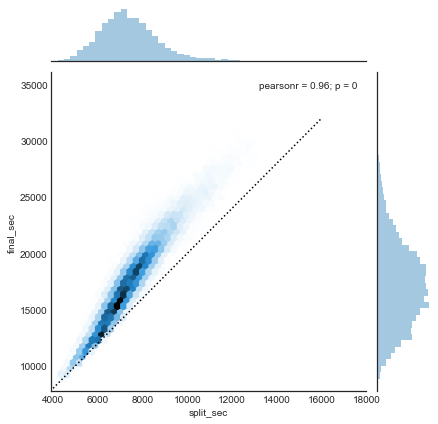

In [62]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
    np.linspace(8000, 32000), ':k')

### Bar chart

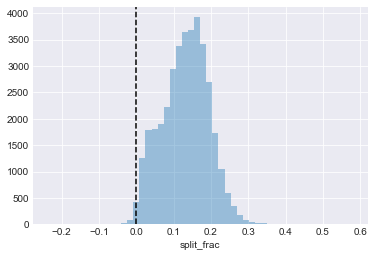

In [63]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

### Pair Plots

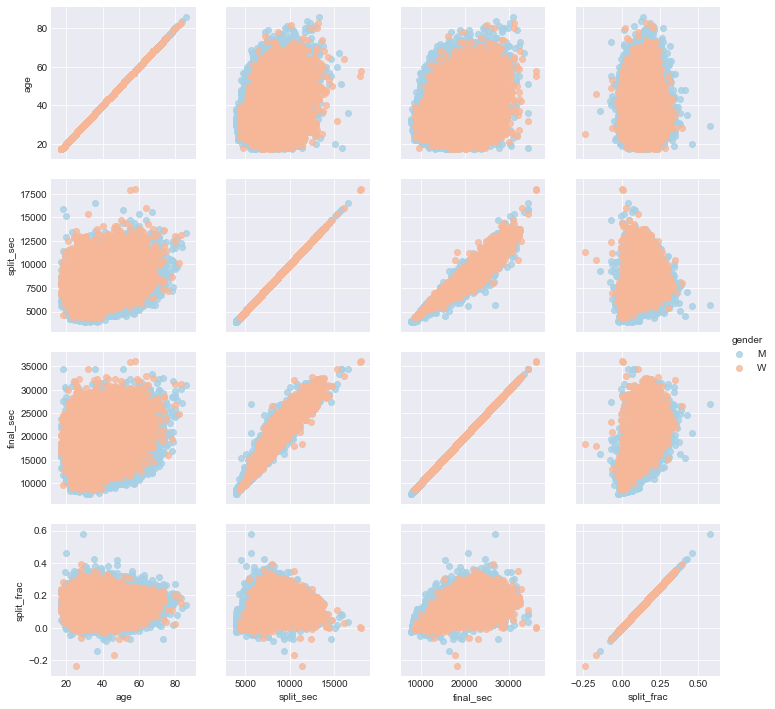

In [64]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

### KDE

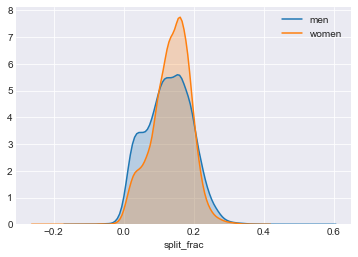

In [65]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

### Factor Plots - Violin 

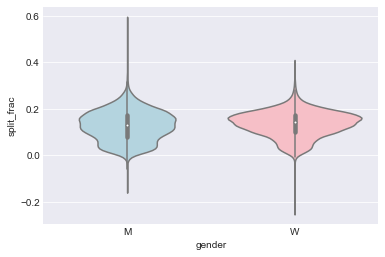

In [66]:
sns.violinplot("gender", "split_frac", data=data,
                palette=["lightblue", "lightpink"]);

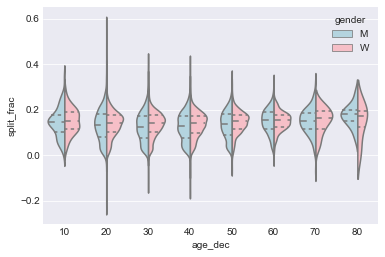

In [68]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
men = (data.gender == 'M')
women = (data.gender == 'W')
with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                    split=True, inner="quartile",
                    palette=["lightblue", "lightpink"]);

### Correlations

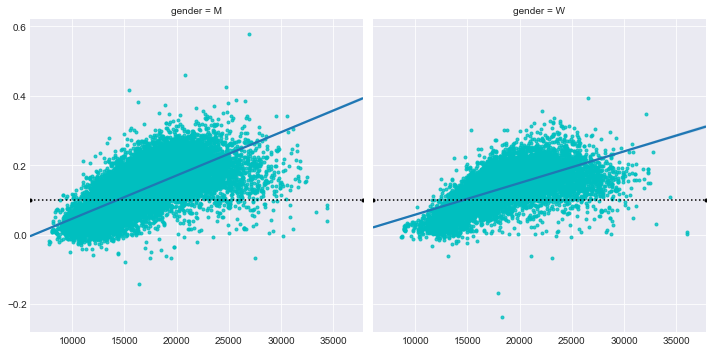

In [69]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
                markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");